In [152]:
import numpy as np
from scipy.integrate import Radau as RK

In [168]:
def geodesic(tau, y):
    """
    y[0] = t
    y[1] = dt
    y[2] = r
    y[3] = dr
    y[4] = phi
    y[5] = dphi
    y[6] = mass
    
    F[0] = dt
    F[1] = d^2t
    F[2] = dr
    F[3] = d^2r
    F[4] = dphi
    F[5] = d^2phi
    F[6] = mass change (0)
    """
    F = np.zeros_like(y, dtype=float)
    G = 1
    c = 1
    M = y[6]
    R = (2*G*M)/c**2
    F[0] = y[1]
    F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
    F[2] = y[3]
    F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/(2*(y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
    F[4] = y[5]
    F[5] = -(2/y[2])*y[3]*y[5]
    F[6] = 0
    
    return F

In [208]:
def initial_y(t,r,phi,m):
    y = np.zeros(shape = (7), dtype = float)
    G = 1
    c = 1
    R = (2*G*m)/c**2
    dphi = (np.sqrt((G*m)/r))/r
    y[0] = t
    y[1] = np.sqrt((c**2+((r**2)*(dphi**2)))/(1-R/r))
    y[2] = r
    y[3] = 0
    y[4] = phi
    y[5] = dphi
    y[6] = m
    return y

#y = initial_y(0,1.5e+11,0,1.99e+30)
#geodesic(0, y)
#y

In [249]:
y = initial_y(0,400,np.pi/2,10)
#print(y)
#y = (0,4.46e+15,1.5e+11,-1000000000,0,2.97e+4,1.99e+30)
runga = RK(fun = geodesic, t0 = 0, y0 = y, t_bound = 20000, max_step = 100, first_step = 0.1, atol = 1e-8, rtol = 1e-8)
y_values = [y]
t_values = [0]
num = 0
while(1>0):
    # get solution step state
    runga.step()
    y_values.append(runga.y)
    print(runga.y)
    t_values.append(runga.t)
    # break loop after modeling is finished
    num+=1
    print(num)
    if runga.status == 'finished':
        break
print(y_values)
print(len(y_values))
print(t_values)

[ 1.03872391e-01  1.03872391e+00  4.00000000e+02 -4.68750000e-07
  1.57083586e+00  3.95284708e-04  1.00000000e+01]
1
[ 1.14259630e+00  1.03872391e+00  3.99999997e+02 -5.15624989e-06
  1.57123114e+00  3.95284713e-04  1.00000000e+01]
2
[ 1.15298356e+01  1.03872395e+00  3.99999711e+02 -5.20311331e-05
  1.57518399e+00  3.95285278e-04  1.00000000e+01]
3
[ 1.15402373e+02  1.03872787e+00  3.99971074e+02 -5.20664062e-04
  1.61471458e+00  3.95341884e-04  1.00000000e+01]
4
[ 2.19275623e+02  1.03873819e+00  3.99895597e+02 -9.88727195e-04
  1.65425545e+00  3.95491132e-04  1.00000000e+01]
5
[ 3.23150224e+02  1.03875491e+00  3.99773365e+02 -1.45570699e-03
  1.69381589e+00  3.95733016e-04  1.00000000e+01]
6
[ 4.27026817e+02  1.03877802e+00  3.99604509e+02 -1.92108864e-03
  1.73340514e+00  3.96067525e-04  1.00000000e+01]
7
[ 5.30906041e+02  1.03880753e+00  3.99389217e+02 -2.38435550e-03
  1.77303248e+00  3.96494643e-04  1.00000000e+01]
8
[ 6.34788535e+02  1.03884341e+00  3.99127726e+02 -2.84498850e-03

[400.         399.99999998 399.99999716 399.99971123 399.97107386
 399.89559741 399.77336453 399.60450928 399.38921729 399.12772597
 398.82032478 398.46735556 398.06921291 397.62634461 397.13925213
 396.60849112 396.03467203 395.41846066 394.76057887 394.06180522
 393.32297566 392.54498429 391.72878406 390.87538752 389.98586756
 389.0613581  388.10305483 387.11221585 386.09016229 385.03827886
 383.95801437 382.85088212 381.71846016 380.56239155 379.38438431
 378.18621137 376.96971023 375.73678251 374.48939319 373.22956968
 371.95940057 370.68103415 369.39667652 368.10858945 366.81908784
 365.53053677 364.2453482  362.96597717 361.69491762 360.43469767
 359.18787455 357.95702885 356.74475851 355.5536721  354.3863818
 353.24549579 352.1336102  351.05330071 350.00711363 348.99755674
 348.02708975 347.09811453 346.21296515 345.3738978  344.58308068
 343.84258391 343.15436965 342.52028229 341.94203915 341.42122147
 340.95926596 340.55745697 340.21691931 339.93861195 339.72332246
 339.571662

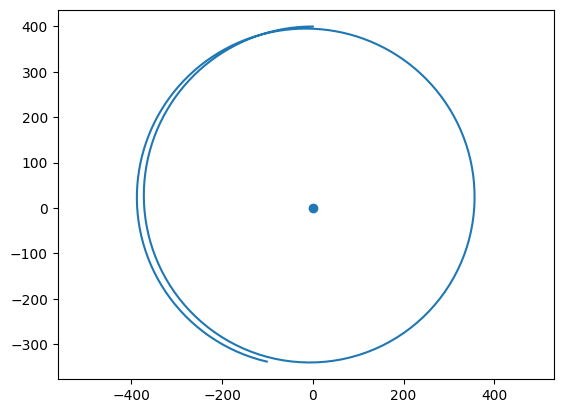

In [250]:
import matplotlib.pyplot as plt
y_values = np.array(y_values)
r = y_values[:,2]
phi = y_values[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
plt.axis('equal')
plt.scatter(0,0)
print(r)
print(phi)


C:\Users\bryce\AppData\Local\Temp\ipykernel_30712\3781103428.py:27: RuntimeWarning: overflow encountered in scalar multiply
  F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/(2*(y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
C:\Users\bryce\AppData\Local\Temp\ipykernel_30712\3781103428.py:27: RuntimeWarning: overflow encountered in scalar power
  F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/(2*(y[2]**2)*(1-(R/y[2])))) - ((G*M)/y[2]**2)*(1-(R/y[2]))*y[1]**2
C:\Users\bryce\AppData\Local\Temp\ipykernel_30712\3781103428.py:25: RuntimeWarning: overflow encountered in scalar power
  F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
C:\Users\bryce\AppData\Local\Temp\ipykernel_30712\3781103428.py:25: RuntimeWarning: invalid value encountered in scalar multiply
  F[1] = -(R/((y[2]**2)*(1-(R/y[2]))))*y[3]*y[1]
C:\Users\bryce\AppData\Local\Temp\ipykernel_30712\3781103428.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  F[3] = (y[2]-R)*y[5]**2 + (y[3]**2)*(R/(2*(y[2]**2)*(1-(R/y[

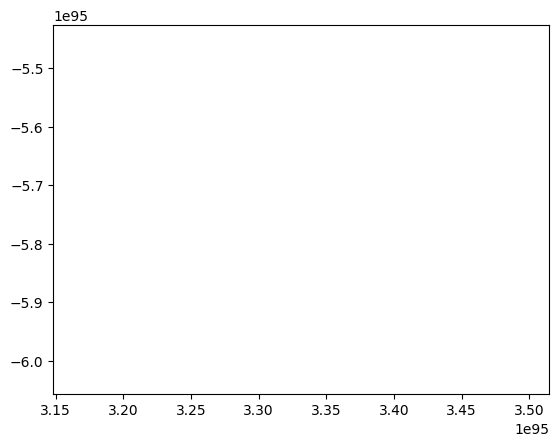

In [151]:
def rungaKutta(y,h):
    k1 = h * geodesic(0,y)
    k2 = h * geodesic(0,y + 0.5*k1)
    k3 = h * geodesic(0,y + 0.5*k2)
    k4 = h * geodesic(0,y + k3)    
    return (y + k1/6. + k2/3. + k3/3. + k4/6.)
y = initial_y(0,1.5e+11,0,1.99e+30)
y_vals = []
for i in range(100):
     y = rungaKutta(y, 1000)
     y_vals.append(y)
y_vals = np.array(y_vals)
r = y_vals[:,2]
phi = y_vals[:,4]
x = r*np.cos(phi)
y = r*np.sin(phi)
plt.plot(x,y)
     